In [103]:
%matplotlib inline
import pandas as pd
from IPython.display import display
import matplotlib
#matplotlib.use('pgf')
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sqlite3


sns.set(rc={"xtick.bottom" : True, "ytick.left" : True, 'text.usetex' : True})
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] =(20,10)
pd.options.display.max_rows = 2000
plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['font.family'] = 'cmu serif'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

sns.set_context('paper', font_scale=3.5)

conn = sqlite3.connect("../hpc-db.sqlite")

In [18]:
def get_pareto_frontier(df, x, y, split):
    # removes all rows that don't lie on the pareto frontier
    to_plot = df.sort_values(y,ascending=False).reset_index(drop=True)
    d = {} # store last x values
    drop_list = []
    for algo in set(df[split]):
        d[algo] = 0
    for i in range(len(to_plot)):
        x_ = to_plot.iloc[i][x]
        y_ = to_plot.iloc[i][y]
        algo = to_plot.iloc[i][split]
        if x_ > d[algo]:
            d[algo] = x_
        else:
            drop_list.append(i)
    to_plot.drop(drop_list, inplace=True)
        
    return to_plot

In [19]:
df = pd.read_sql_query("select * from recent_results;", conn);

In [20]:
df.head()

,sha,git_rev,hostname,date,dataset,dataset_version,algorithm,algorithm_version,parameters,running_time_ns,seed,experiment_file,components,version_brute_force,version_filter,version_distance,version_storage,recall
0,00a7bf72533754db77e4e11747d15b9d74eb4c739c64c3...,,NULL,2020-06-18T12:51:46.902330,glove-100-angular,1,bruteforce,4,method=avx2;storage=float_aligned;filter=true;...,582691540,4132,experiments/sketch-test.yaml,filter_float_aligned_avx2,1,1,3,1,0.87
1,0aed84ba724bbd2832720729947b825a7105290616af27...,,NULL,2020-06-18T12:50:27.938325,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,873836335,4132,experiments/sketch-test.yaml,filter_float_aligned_simple,1,1,1,1,0.90
2,10aa5daa7d6199ae442399575814f51704929e65cb6267...,,NULL,2020-06-18T12:50:19.098820,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,763988461,4132,experiments/sketch-test.yaml,filter_float_aligned_simple,1,1,1,1,0.83
3,14c20350aa57cbea3ff636c4b608a1a7419a509a1d971f...,,NULL,2020-06-18T12:52:05.321131,glove-100-angular,1,bruteforce,4,method=avx2;storage=float_aligned;filter=true;...,1355737650,4132,experiments/sketch-test.yaml,filter_float_aligned_avx2,1,1,3,1,0.94
4,15e237832f109d549630eb7b472764b1b3fc515e3f70aa...,,NULL,2020-06-18T12:50:46.766907,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,1687880042,4132,experiments/sketch-test.yaml,filter_float_aligned_simple,1,1,1,1,0.98


In [21]:
p = r'method=(?P<method>\w*);storage=(?P<storage>\w*);(filter=(?P<filter>\w*);recall=(?P<recall_wish>[\d.]*).*)?'

df[['method', 'storage', 'filter', 'recall_wish']] = df.parameters.str.extract(p, expand=True)[['method', 'storage', 'filter', 'recall_wish']]
df = df[df.method.notnull()]
df

,sha,git_rev,hostname,date,dataset,dataset_version,algorithm,algorithm_version,parameters,running_time_ns,...,components,version_brute_force,version_filter,version_distance,version_storage,recall,method,storage,filter,recall_wish
0,00a7bf72533754db77e4e11747d15b9d74eb4c739c64c3...,,NULL,2020-06-18T12:51:46.902330,glove-100-angular,1,bruteforce,4,method=avx2;storage=float_aligned;filter=true;...,582691540,...,filter_float_aligned_avx2,1,1,3,1,0.87,avx2,float_aligned,true,0.2
1,0aed84ba724bbd2832720729947b825a7105290616af27...,,NULL,2020-06-18T12:50:27.938325,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,873836335,...,filter_float_aligned_simple,1,1,1,1,0.90,simple,float_aligned,true,0.1
2,10aa5daa7d6199ae442399575814f51704929e65cb6267...,,NULL,2020-06-18T12:50:19.098820,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,763988461,...,filter_float_aligned_simple,1,1,1,1,0.83,simple,float_aligned,true,0.001
3,14c20350aa57cbea3ff636c4b608a1a7419a509a1d971f...,,NULL,2020-06-18T12:52:05.321131,glove-100-angular,1,bruteforce,4,method=avx2;storage=float_aligned;filter=true;...,1355737650,...,filter_float_aligned_avx2,1,1,3,1,0.94,avx2,float_aligned,true,0.7
4,15e237832f109d549630eb7b472764b1b3fc515e3f70aa...,,NULL,2020-06-18T12:50:46.766907,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,1687880042,...,filter_float_aligned_simple,1,1,1,1,0.98,simple,float_aligned,true,0.5
5,195f473ad1001d64f53111ac51c6a803300d78ebffdd40...,,NULL,2020-06-18T12:53:31.016952,glove-100-angular,1,bruteforce,4,method=avx512;storage=float_aligned;filter=tru...,2697942699,...,filter_float_aligned_avx512,1,1,1,1,1.00,avx512,float_aligned,true,0.99
6,1e8a99f7b5a128fa1ba45c9ea1c4eeeabcf5ed32786880...,,NULL,2020-06-18T12:55:11.447360,glove-100-angular,1,bruteforce,4,method=avx2;storage=i16_aligned;filter=true;re...,297590805,...,filter_i16_aligned_avx2,1,1,1,1,0.66,avx2,i16_aligned,true,0.001
7,1f09921ae32f36cb25027448c564e54dedcd008b273e3a...,,NULL,2020-06-18T12:56:52.056514,glove-100-angular,1,bruteforce,4,method=avx512;storage=i16_aligned;filter=true;...,868082002,...,filter_i16_aligned_avx512,1,1,1,1,0.92,avx512,i16_aligned,true,0.2
8,2530802553760608096f5dd26414b60384cc2cb57dbc0a...,,NULL,2020-06-18T12:52:51.869154,glove-100-angular,1,bruteforce,4,method=avx512;storage=float_aligned;filter=tru...,565157203,...,filter_float_aligned_avx512,1,1,1,1,0.82,avx512,float_aligned,true,0.2
9,26ef09635ef224996c7d51edd760d5834f2b1a3ec8a94f...,,NULL,2020-06-18T12:53:19.919532,glove-100-angular,1,bruteforce,4,method=avx512;storage=float_aligned;filter=tru...,1857732039,...,filter_float_aligned_avx512,1,1,1,1,1.00,avx512,float_aligned,true,0.9


[]

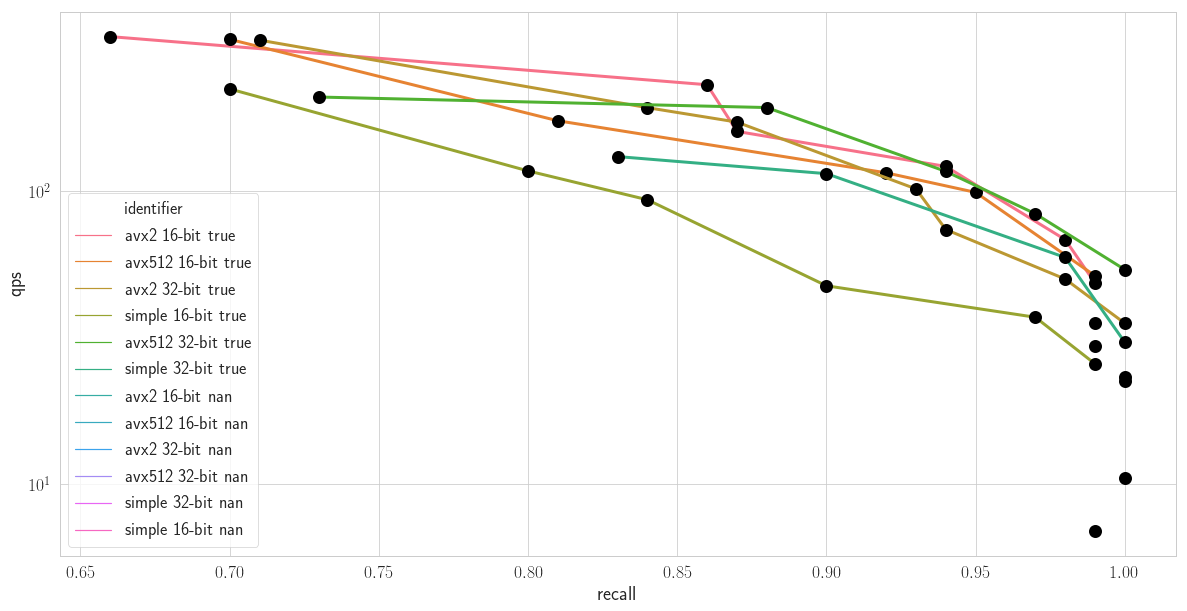

In [62]:
df.replace({"float_aligned" : "32-bit", "i16_aligned" : "16-bit"}, inplace=True,regex=True)
df["qps"] = df.apply(lambda row: 1 / ((row["running_time_ns"] / 100.0) / 1e9), axis=1 )
df["identifier"] = df.apply(lambda row: row["method"] + " " + row["storage"] + " " + str(row["filter"]), axis=1)


g = sns.lineplot(data=get_pareto_frontier(df, 'recall', 'qps', 'identifier'), x='recall', y='qps', hue='identifier', markers=True, dashes=False,
                 marker='o', ms=10, mew=3, lw=3, color='black', markeredgecolor='black', markerfacecolor="black", legend="full", err_style=None)
g.semilogy()

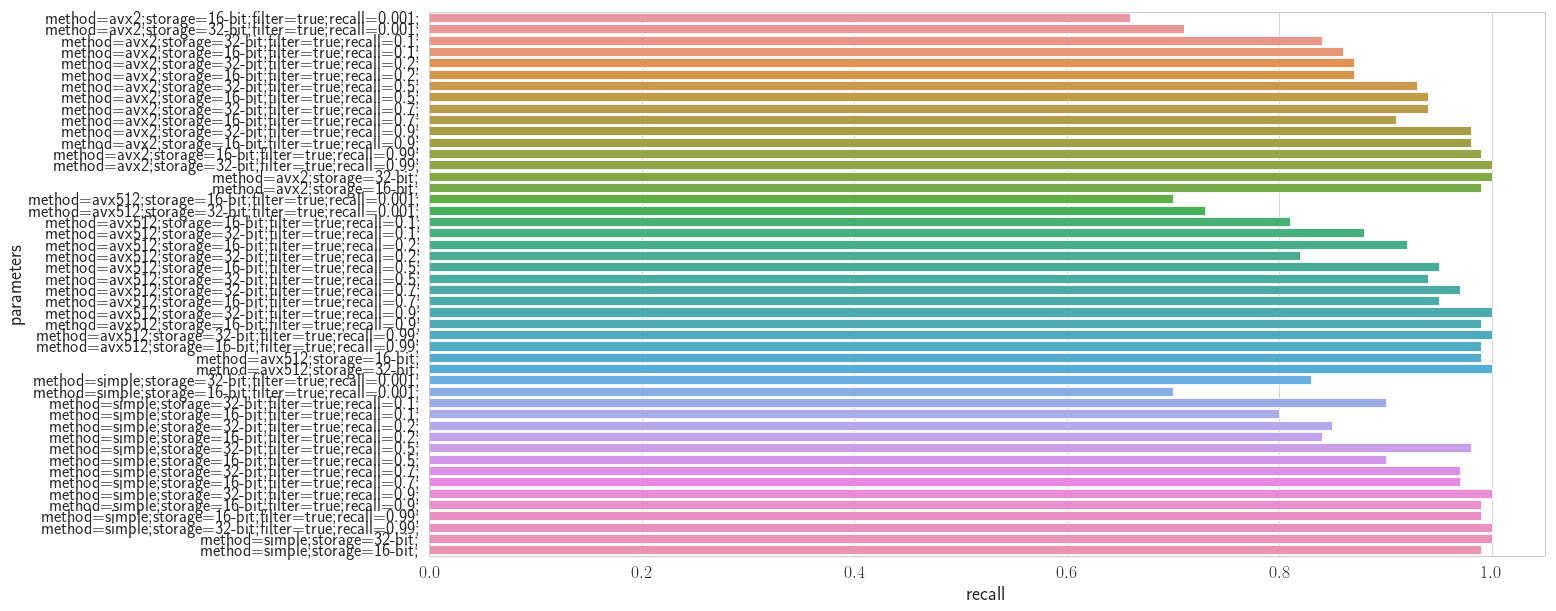

In [66]:
sns.barplot(data=df.sort_values(['method', 'recall_wish']), y='parameters', x='recall')

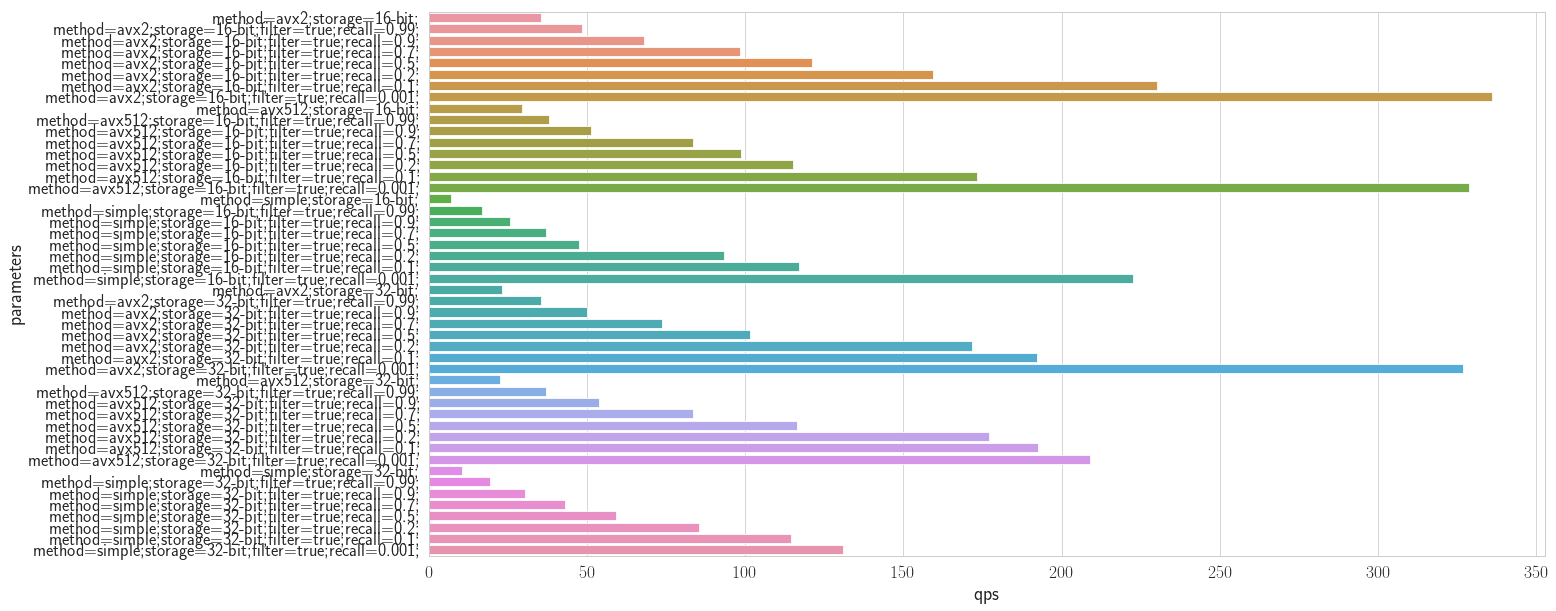

In [65]:
sns.barplot(data=df.sort_values(['storage', 'method', 'qps']), y='parameters', x='qps')

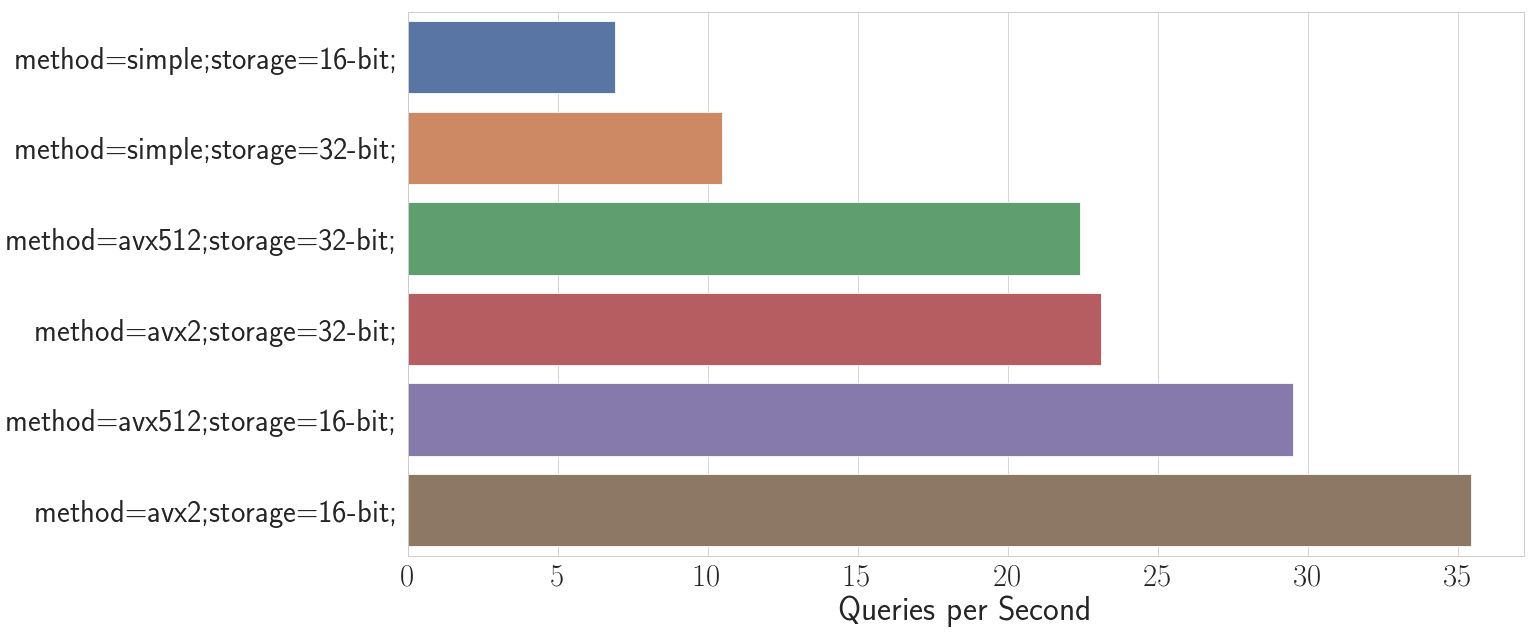

In [107]:
sns.barplot(data=df[~df.parameters.str.contains("recall")].sort_values(['qps']), y='parameters', x='qps')
plt.ylabel("")
plt.xlabel("Queries per Second")
plt.savefig("linearscan_no_filter.png", bboxes='tight')

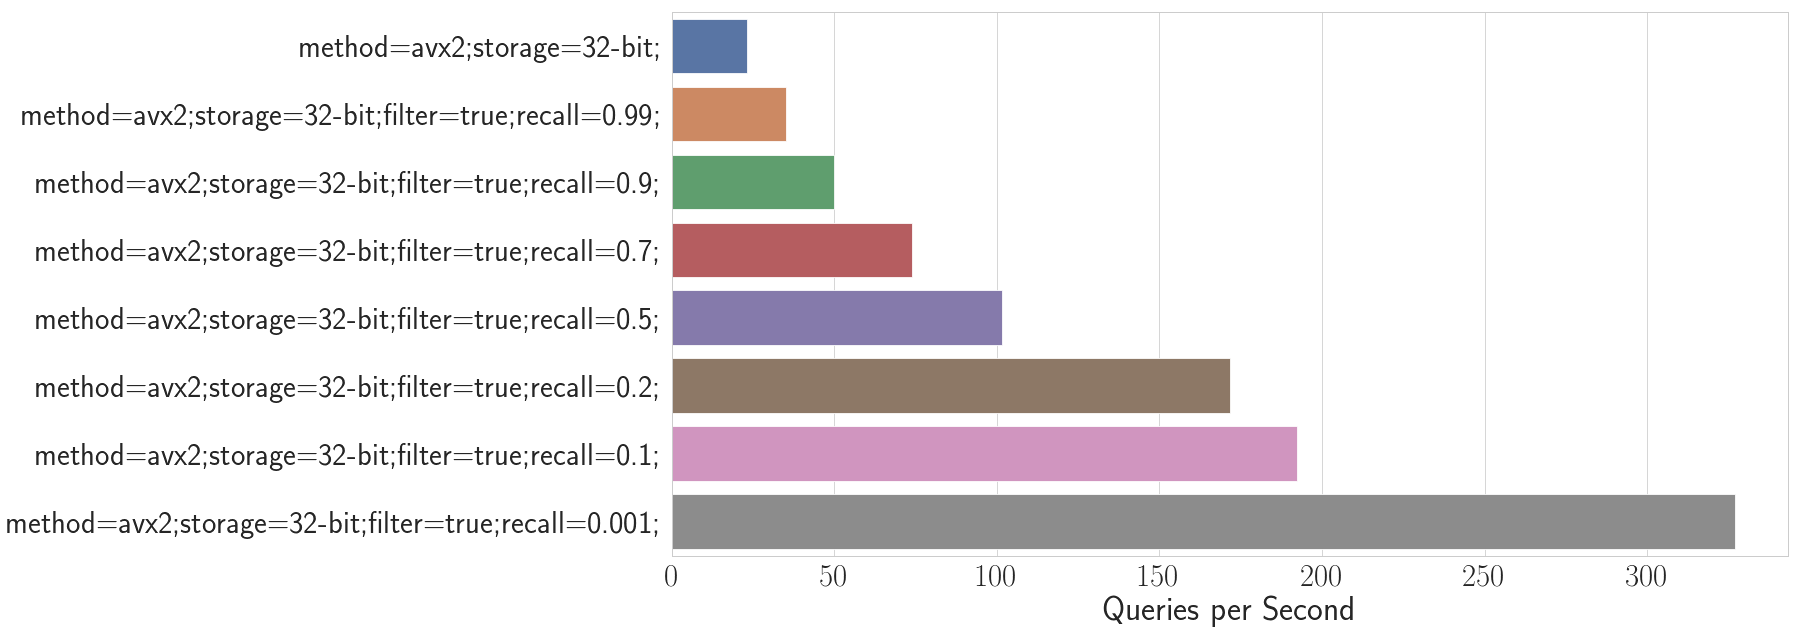

In [106]:
sns.barplot(data=df[(df.parameters.str.contains("32-bit")) & (df.parameters.str.contains("avx2"))].sort_values(['qps']), y='parameters', x='qps')
plt.ylabel("")
plt.xlabel("Queries per Second")
plt.savefig("32bit_filter.png", bboxes='tight')

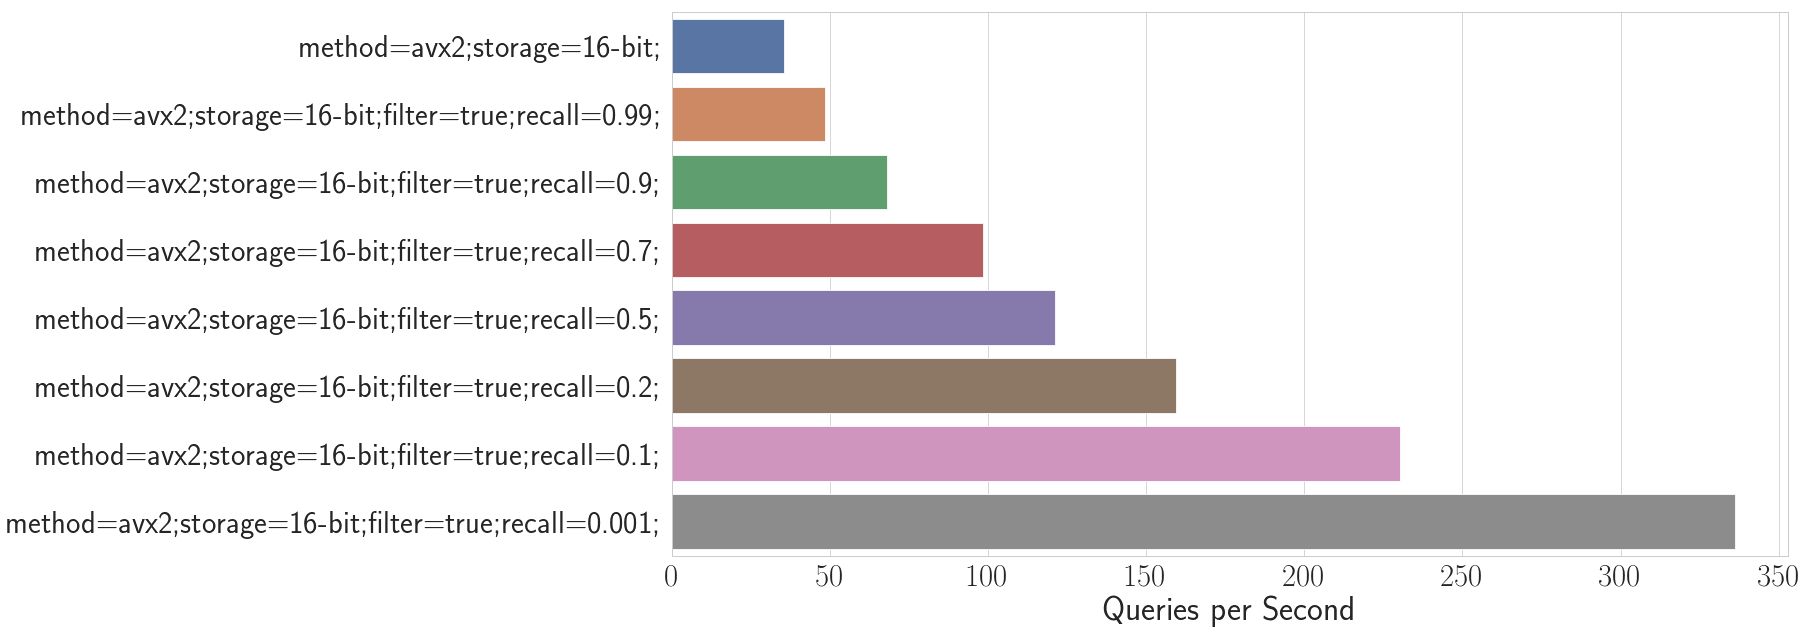

In [105]:
sns.barplot(data=df[(df.parameters.str.contains("16-bit")) & (df.parameters.str.contains("avx2"))].sort_values(['qps']), y='parameters'
, x='qps')
plt.ylabel("")
plt.xlabel("Queries per Second")
plt.savefig("16bit_filter.png", bboxes='tight')

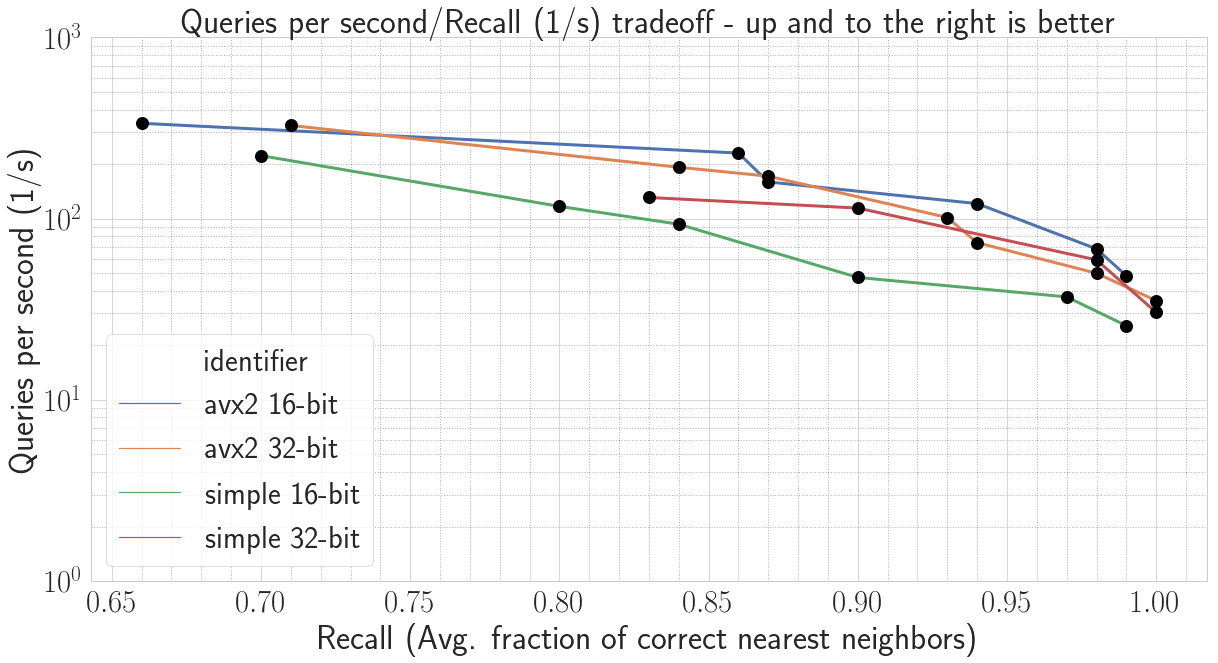

In [104]:
plot_df = get_pareto_frontier(df, 'recall', 'qps', 'identifier')
plot_df = plot_df[~plot_df.parameters.str.contains("avx512") & (plot_df["filter"].notnull())]
plot_df.replace({" true" : ""}, inplace=True, regex=True)
ax = sns.lineplot(data=plot_df, 
                 x='recall', y='qps', hue='identifier', markers=True, dashes=False,
                 marker='o', ms=10, mew=3, lw=3, color='black', markeredgecolor='black', 
                 markerfacecolor="black", legend="full", err_style=None)

ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth=1, alpha=.3, color='black')
ax.semilogy()
ax.set(ylim=(1,1000))
plt.title("Queries per second/Recall (1/s) tradeoff - up and to the right is better")
plt.ylabel("Queries per second (1/s)")
plt.xlabel("Recall (Avg. fraction of correct nearest neighbors)")
plt.savefig('avx2_16vs32bit.png', bboxes='tight')